In [1]:
import sys
sys.path.append("..")
import TabularMethods.action_value_methods as avm
import utils
import gymnasium as gym
import random
import numpy as np

# Settings

In [2]:
ENVIRONMENT_ID = "FrozenLake-v1"
NUM_RUNS_PER_METHOD = 9
NUM_EPISODES_PER_RUN = 10000
GAMMA = 1
TRACE_DECAY_RATE = 0.8
EPS_START = 1
EPS_END = 0.00
LEARNING_RATE = 0.1
RNG_SEED = 7
random.seed(RNG_SEED)

# One step Sarsa

Started run 1/9
Started run 2/9
Started run 3/9
Started run 4/9
Started run 5/9
Started run 6/9
Started run 7/9
Started run 8/9
Started run 9/9


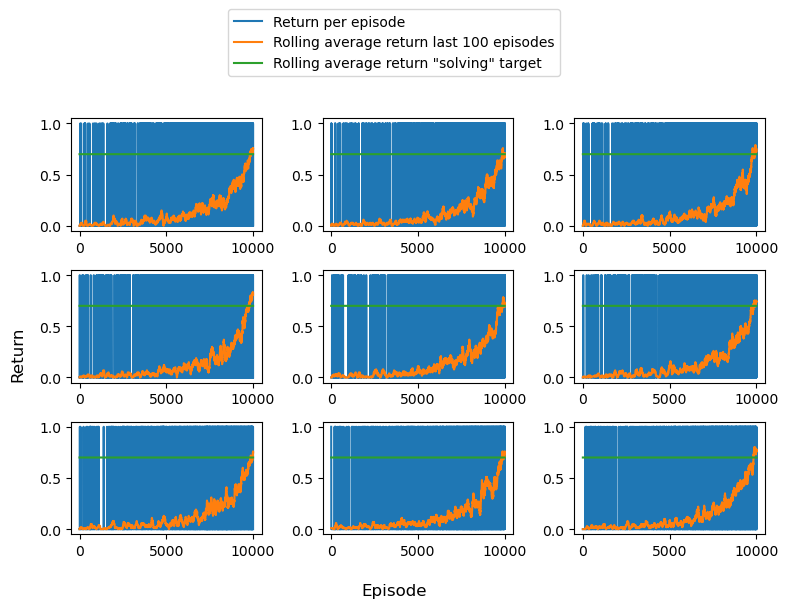

In [3]:
returns_per_run = []
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
for run in range(NUM_RUNS_PER_METHOD):
    print(f"Started run {run + 1}/{NUM_RUNS_PER_METHOD}")
    init_action_values = np.zeros((env.observation_space.n, env.action_space.n))
    returns, Q = avm.train_episodic_sarsa(
        env, init_action_values, RNG_SEED, NUM_EPISODES_PER_RUN, GAMMA, EPS_START, EPS_END, LEARNING_RATE
    )
    returns_per_run.append(returns)
env.close()
utils.plot_returns_multiple_runs(returns_per_run, env.spec.reward_threshold)

# Sarsa($\lambda$)

(Sarsa with eligibility-trace)

Started run 1/9
Started run 2/9
Started run 3/9
Started run 4/9
Started run 5/9
Started run 6/9
Started run 7/9
Started run 8/9
Started run 9/9


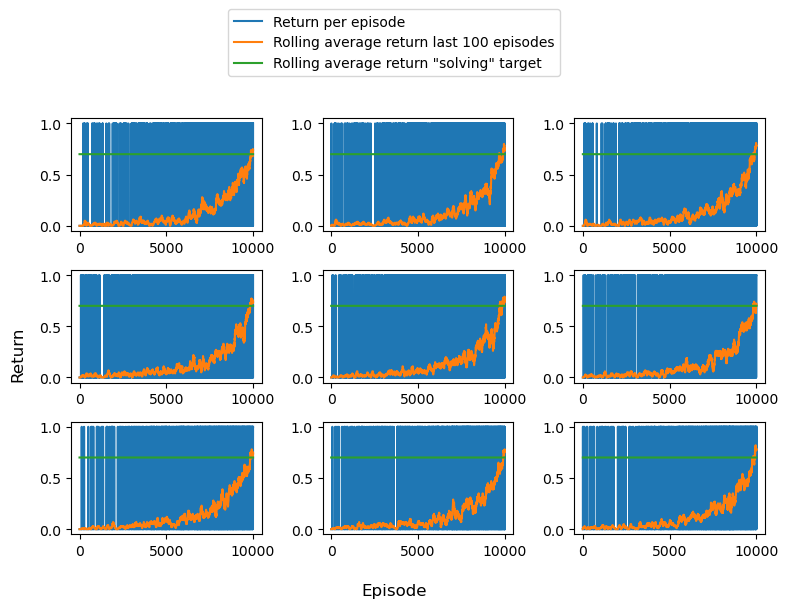

In [4]:
returns_per_run = []
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
for run in range(NUM_RUNS_PER_METHOD):
    print(f"Started run {run + 1}/{NUM_RUNS_PER_METHOD}")
    init_action_values = np.zeros((env.observation_space.n, env.action_space.n))
    returns, Q = avm.train_episodic_sarsa_lambda(
        env, init_action_values, RNG_SEED, NUM_EPISODES_PER_RUN, GAMMA, TRACE_DECAY_RATE, EPS_START, EPS_END, 0.02
    )
    returns_per_run.append(returns)
env.close()
utils.plot_returns_multiple_runs(returns_per_run, env.spec.reward_threshold)